# Reprojecting CDP Coordinates of Seismic Data

This notebook illustrates how to reproject coordinates of CDP points of seismic data. This is necessary when the coordinate system is not the target coordinate system. The coordinates will be reprojected using the `segysak` package (https://segysak.readthedocs.io/en/latest/index.html, https://github.com/trhallam/segysak).

# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

import numpy as np

import segysak
from segysak.segy import segy_header_scan, segy_loader

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\segysak\segy\_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Scanning SEGY Header

Here, we are using seismic data that can be freely downloaded from https://www.nlog.nl/en/map-boreholes.

In [2]:
scan = segy_header_scan('../../data/seismic_data/09-02_crs_PostSTM_fisc.sgy.val')
scan

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
TRACE_SEQUENCE_FILE,5,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
FieldRecord,9,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
TraceNumber,13,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
EnergySourcePoint,17,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
CDP,21,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
CDP_TRACE,25,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
TraceIdentificationCode,29,1000.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.0
NSummedTraces,31,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
NStackedTraces,33,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0


# Extracting Data

The data can be extracted using the `segy_loader` function.

In [3]:
data = segy_loader('../../data/seismic_data/09-02_crs_PostSTM_fisc.sgy.val')
data


Loading as 2D


<xarray.Dataset>
Dimensions:  (cdp: 2702, twt: 2551)
Coordinates:
  * cdp      (cdp) uint16 1 2 3 4 5 6 7 8 ... 2696 2697 2698 2699 2700 2701 2702
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 5.096e+03 5.098e+03 5.1e+03
    cdp_x    (cdp) float32 1.941e+05 1.941e+05 1.941e+05 ... 2.207e+05 2.207e+05
    cdp_y    (cdp) float32 3.825e+05 3.825e+05 3.825e+05 ... 3.822e+05 3.822e+05
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C01 CLIENT: Grondexploitatiemaatschappij Californi  ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         09-02_crs_PostSTM_fisc.sgy.val
    srd:                 None
    datatype:            None
    percentiles:         [-3.7702319715117687, -3.5272794003495354, -1.165970...
    coord_scalar:        -1000.0

# Plotting the data

Text(0.5, 0, 'ILINE')

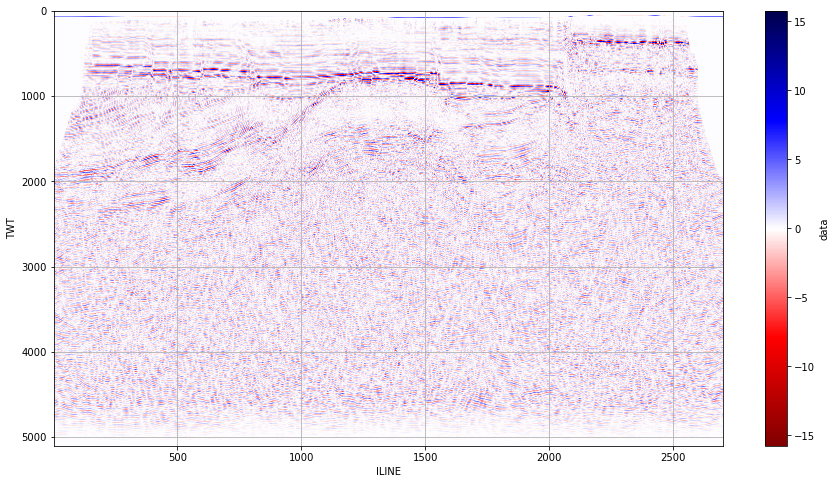

In [4]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 10093
data.data.transpose("twt", "cdp", transpose_coords=True).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("ILINE")

# Extracting the coordinates

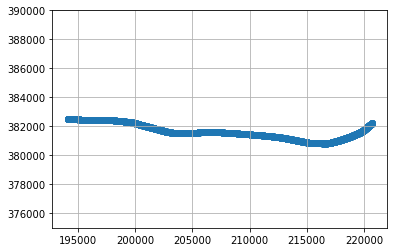

In [5]:
x = np.array(data['cdp_x'])
y = np.array(data['cdp_y'])

plt.scatter(x,y)
plt.ylim(375000, 390000)
plt.grid()

# Saving the Coordinates

In [6]:
np.save('../../data/seismic_data/CDP_X.npy', x)
np.save('../../data/seismic_data/CDP_Y.npy', y)

# Creating GeoDataFrame from coordinates

There seems to be an issue when importing `geopandas` while using `segysak`. Therefore, the coordinates are saved and reloaded again to create the GeoDataFrame. 

In [2]:
import geopandas as gpd
import numpy as np

x = np.load('../../data/seismic_data/CDP_X.npy')
y = np.load('../../data/seismic_data/CDP_Y.npy')
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x=x, y=y), crs='EPSG:28992')
gdf

,geometry
0,POINT (194105.422 382534.062)
1,POINT (194115.391 382533.469)
2,POINT (194125.375 382532.812)
3,POINT (194135.359 382532.219)
4,POINT (194145.328 382531.562)
...,...
2697,POINT (220669.609 382196.344)
2698,POINT (220677.922 382201.906)
2699,POINT (220686.234 382207.438)
2700,POINT (220694.500 382213.031)


# Reprojecting Coordinates

In [3]:
gdf_3034 = gdf.to_crs('EPSG:3034')
gdf_3034

,geometry
0,POINT (3728111.463 2746267.105)
1,POINT (3728121.035 2746265.931)
2,POINT (3728130.619 2746264.696)
3,POINT (3728140.206 2746263.521)
4,POINT (3728149.775 2746262.287)
...,...
2697,POINT (3753694.057 2744337.662)
2698,POINT (3753702.405 2744342.521)
2699,POINT (3753710.750 2744347.350)
2700,POINT (3753719.055 2744352.242)


# Saving Data

In [8]:
np.save('../../data/seismic_data/CDP_X_EPSG3034.npy', gdf_3034.geometry.x.values)
np.save('../../data/seismic_data/CDP_Y_EPSG3034.npy', gdf_3034.geometry.y.values)

# Adding new coordinates to Seismic Data

Restart the kernel before executing the next cells!

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

import numpy as np

import segysak
from segysak.segy import segy_header_scan, segy_loader

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\segysak\segy\_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Scanning SEGY Header

Here, we are using seismic data that can be freely downloaded from https://www.nlog.nl/en/map-boreholes.

In [2]:
scan = segy_header_scan('../../data/seismic_data/09-02_crs_PostSTM_fisc.sgy.val')
scan

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
TRACE_SEQUENCE_FILE,5,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
FieldRecord,9,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
TraceNumber,13,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
EnergySourcePoint,17,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
CDP,21,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
CDP_TRACE,25,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,500.5,7.502500e+02,1000.0
TraceIdentificationCode,29,1000.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.0
NSummedTraces,31,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
NStackedTraces,33,1000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0


# Extracting Data

The data can be extracted using the `segy_loader` function.

In [128]:
data = segy_loader('../../data/seismic_data/09-02_crs_PostSTM_fisc.sgy.val', cdp=21, cdpx=181, cdpy=185)
data


Loading as 2D


<xarray.Dataset>
Dimensions:  (cdp: 2702, twt: 2551)
Coordinates:
  * cdp      (cdp) uint16 1 2 3 4 5 6 7 8 ... 2696 2697 2698 2699 2700 2701 2702
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 5.096e+03 5.098e+03 5.1e+03
    cdp_x    (cdp) float32 194.1 194.1 194.1 194.1 ... 220.7 220.7 220.7 220.7
    cdp_y    (cdp) float32 382.5 382.5 382.5 382.5 ... 382.2 382.2 382.2 382.2
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C01 CLIENT: Grondexploitatiemaatschappij Californi  ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         09-02_crs_PostSTM_fisc.sgy.val
    srd:                 None
    datatype:            None
    percentiles:         [-3.7702319715117687, -3.5272794003495354, -1.165970...
    coord_scalar:        -1000.0

# Plotting the data

Text(0.5, 0, 'ILINE')

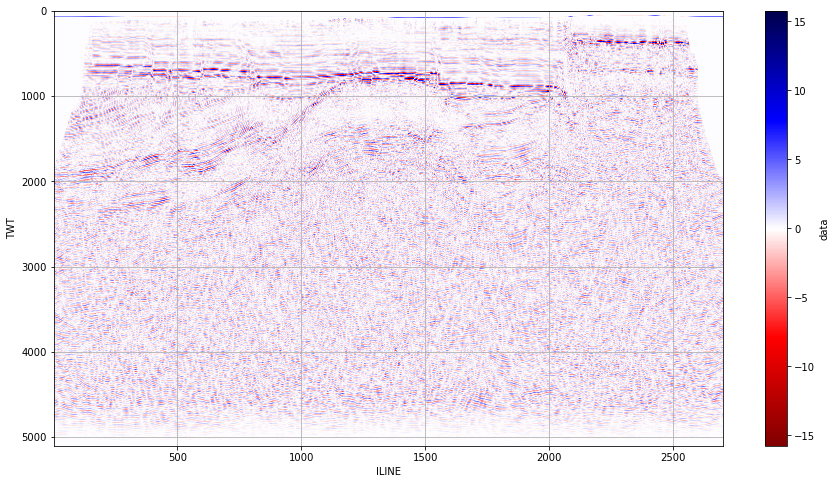

In [129]:
fig, ax1 = plt.subplots(ncols=1, figsize=(15, 8))
iline_sel = 10093
data.data.transpose("twt", "cdp", transpose_coords=True).plot(yincrease=False, cmap="seismic_r")
plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("ILINE")

# Replacing the coordinates

In [130]:
x_3034 = np.load('../../data/seismic_data/CDP_X_EPSG3034.npy')
y_3034 = np.load('../../data/seismic_data/CDP_Y_EPSG3034.npy')

In [151]:
data['cdp_x'] = (("cdp",), np.around(x_3034, 1).astype(np.float64))
data['cdp_y'] = (("cdp",), np.around(x_3034, 1).astype(np.float64))

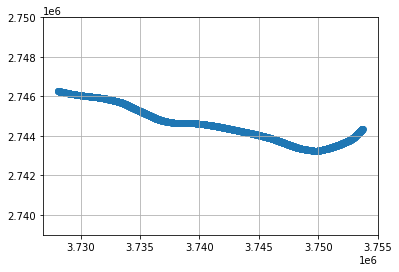

In [124]:
x = np.array(data['cdp_x'])
y = np.array(data['cdp_y'])

plt.scatter(x,y)
plt.ylim(2.739e6, 2.75e6)
plt.grid()

# Saving data to file

In [152]:
data

<xarray.Dataset>
Dimensions:  (cdp: 2702, twt: 2551)
Coordinates:
  * cdp      (cdp) uint16 1 2 3 4 5 6 7 8 ... 2696 2697 2698 2699 2700 2701 2702
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 5.096e+03 5.098e+03 5.1e+03
    cdp_x    (cdp) float64 3.728e+06 3.728e+06 3.728e+06 ... 3.754e+06 3.754e+06
    cdp_y    (cdp) float64 3.728e+06 3.728e+06 3.728e+06 ... 3.754e+06 3.754e+06
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/14)
    ns:                  None
    sample_rate:         2.0
    text:                C01 CLIENT: Grondexploitatiemaatschappij Californi  ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    source_file:         09-02_crs_PostSTM_fisc.sgy.val
    srd:                 None
    datatype:            None
    percentiles:         [-3.7702319715117687, -3.5272794003495354, -1.165970...
    coord_scalar:        -1000.0
    coord_scalar_mult:   1000.0

In [153]:
from segysak.segy import segy_writer

segy_writer(data, 
            segyfile = "09-02_crs_PostSTM_fisc_EPSG3034_test.segy", 
            trace_header_map=dict(cdp=21, cdp_x=181, cdp_y=185))

In [154]:
data_test = segy_loader('09-02_crs_PostSTM_fisc_EPSG3034_test.segy', cdp=21, cdpx=181, cdpy=185)
data_test


Loading as 2D


<xarray.Dataset>
Dimensions:  (cdp: 2702, twt: 2551)
Coordinates:
  * cdp      (cdp) uint16 1 2 3 4 5 6 7 8 ... 2696 2697 2698 2699 2700 2701 2702
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 5.096e+03 5.098e+03 5.1e+03
    cdp_x    (cdp) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    cdp_y    (cdp) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
Data variables:
    data     (cdp, twt) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                C01 segysak Python Library SEG-Y Output\nC02 Data cr...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         09-02_crs_PostSTM_fisc_EPSG3034_test.segy
    srd:                 None
    datatype:            None
    percentiles:         [-3.7702319715117687, -3.5272794003495354, -1.165970...
    coord_scalar:        -1000.0